In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1468,2020-08-30,United Kingdom,333176.0,332752.0,41532.0,41498.0,424.0,34.0
1469,2020-08-30,Germany,242389.0,241771.0,9298.0,9295.0,618.0,3.0
1470,2020-08-30,Iran,373427.0,371816.0,21507.0,21359.0,1611.0,148.0
1471,2020-08-30,Turkey,266755.0,267064.0,6266.0,6284.0,-309.0,-18.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  7623.242362525459
RMSE =  29991.8888594076


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  297.39714867617107
RMSE =  729.2291105839195


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  53184.05714285714
RMSE =  94157.94566987657
-- World performances for deaths --
MAE =  1654.6714285714286
RMSE =  2021.3205160417851


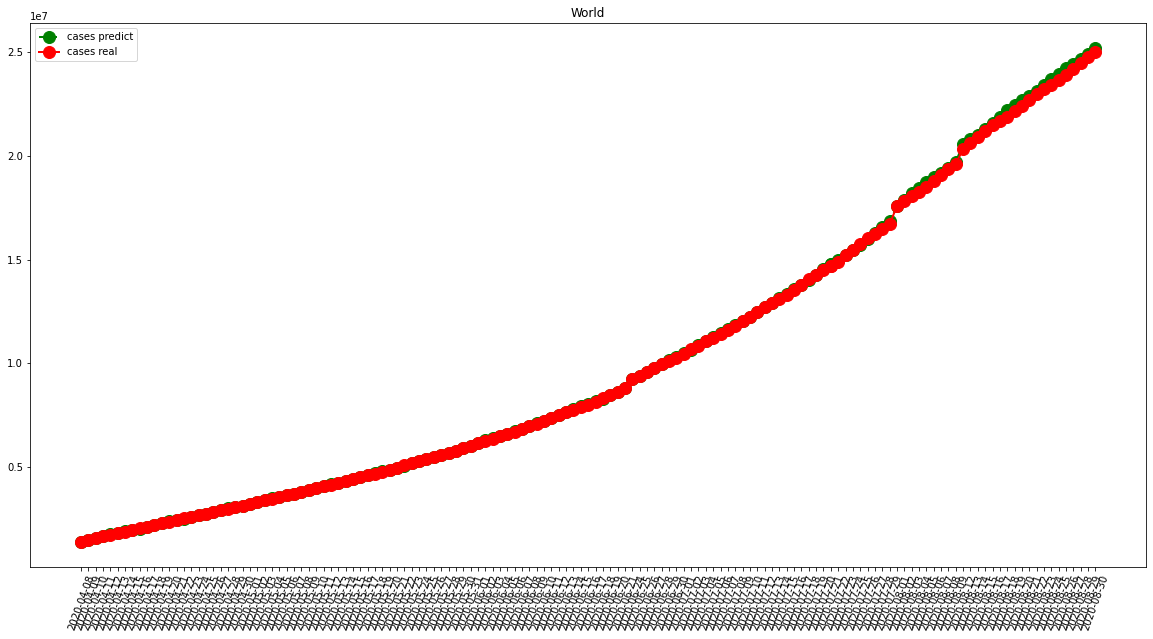

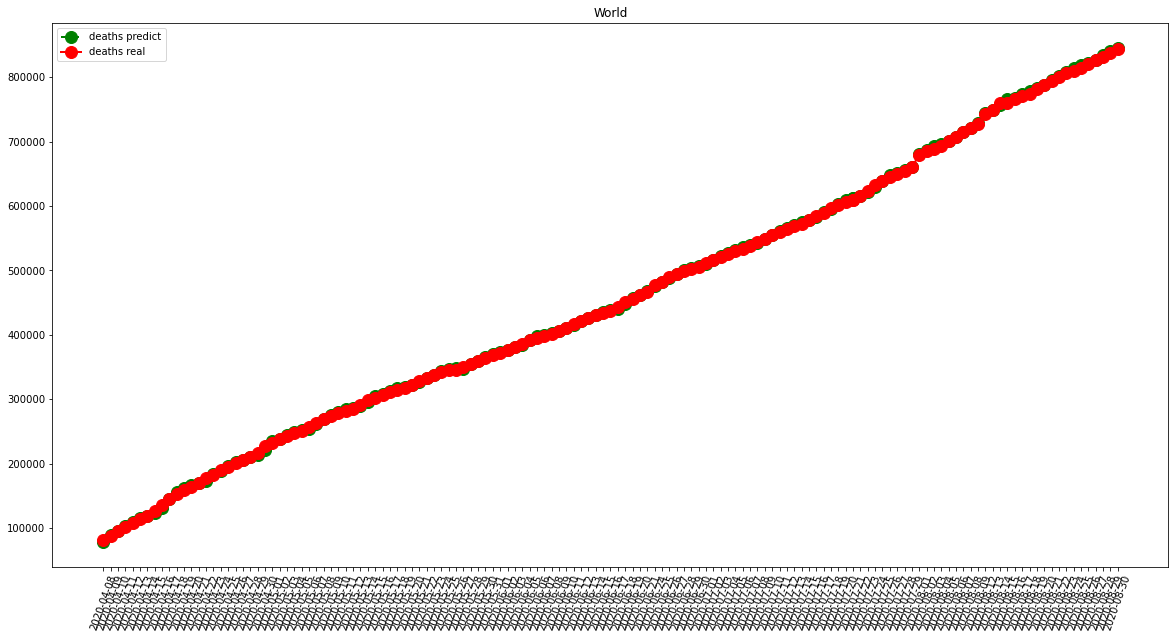

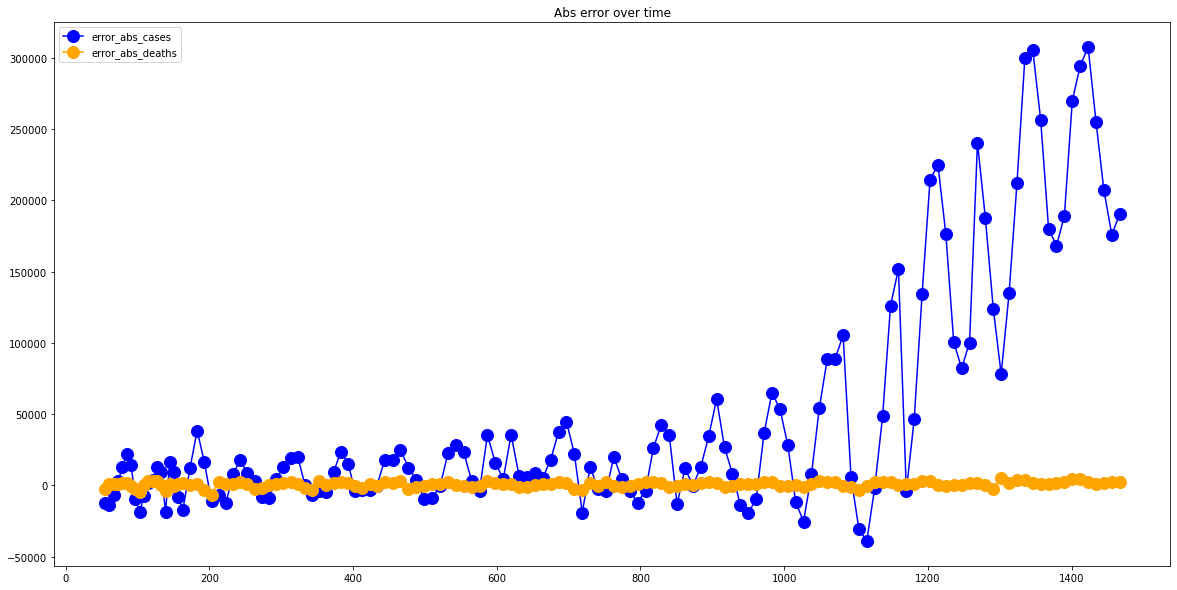

In [7]:
visShow("World")

-- France performances for cases --
MAE =  969.4133333333333
RMSE =  1462.4934005549107
-- France performances for deaths --
MAE =  124.18
RMSE =  273.85031191023563


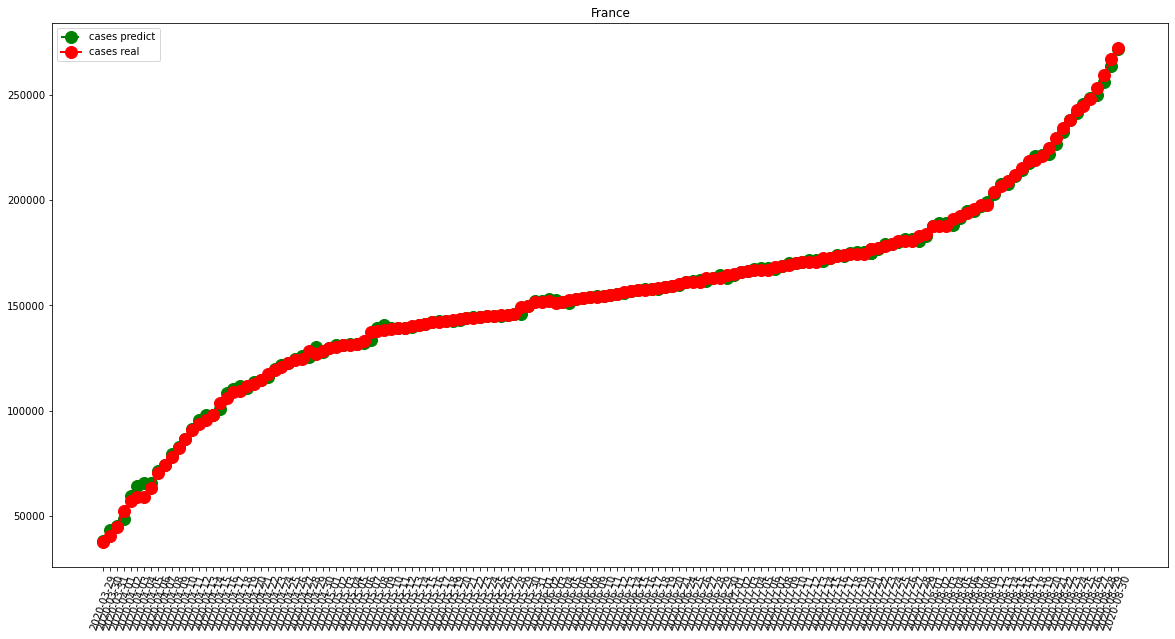

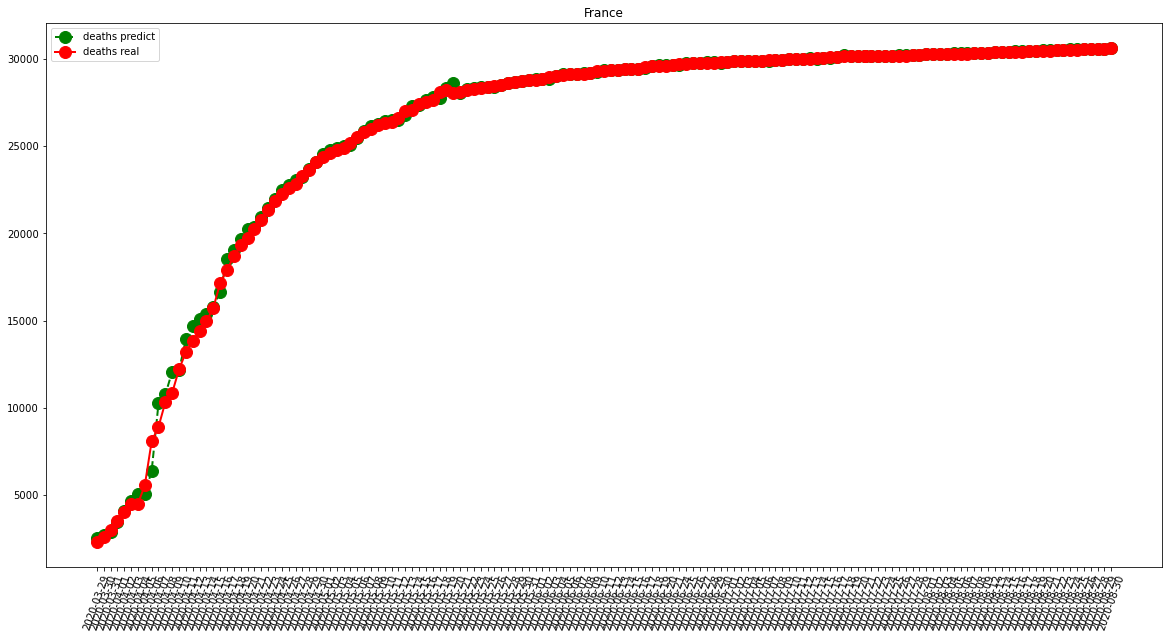

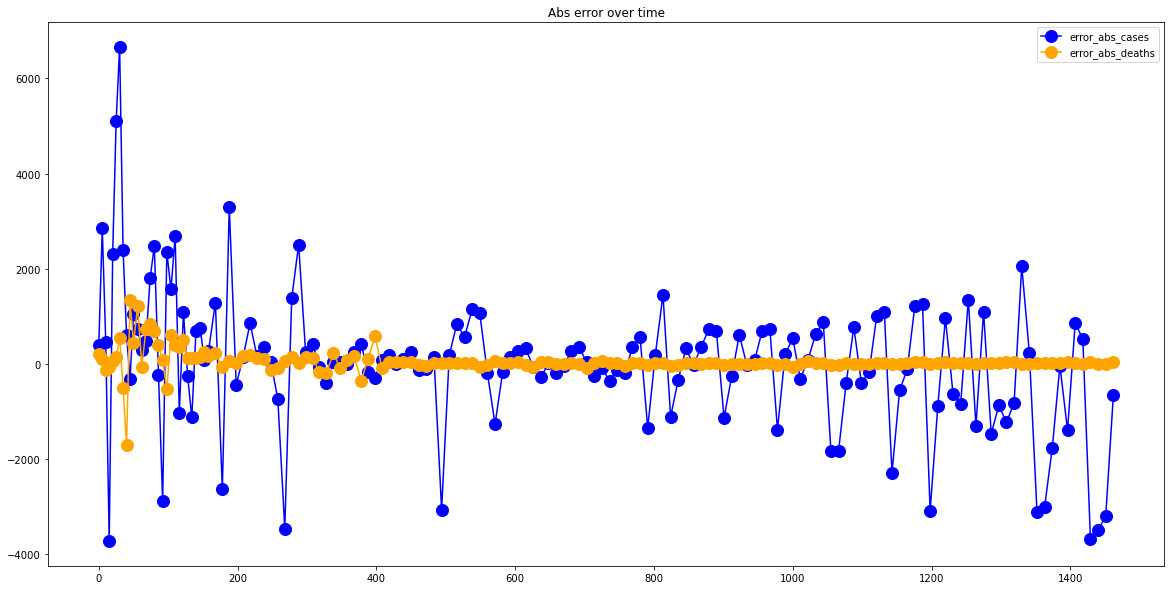

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  303.67333333333335
RMSE =  457.9137109398087
-- Italy performances for deaths --
MAE =  73.96
RMSE =  242.36226328920654


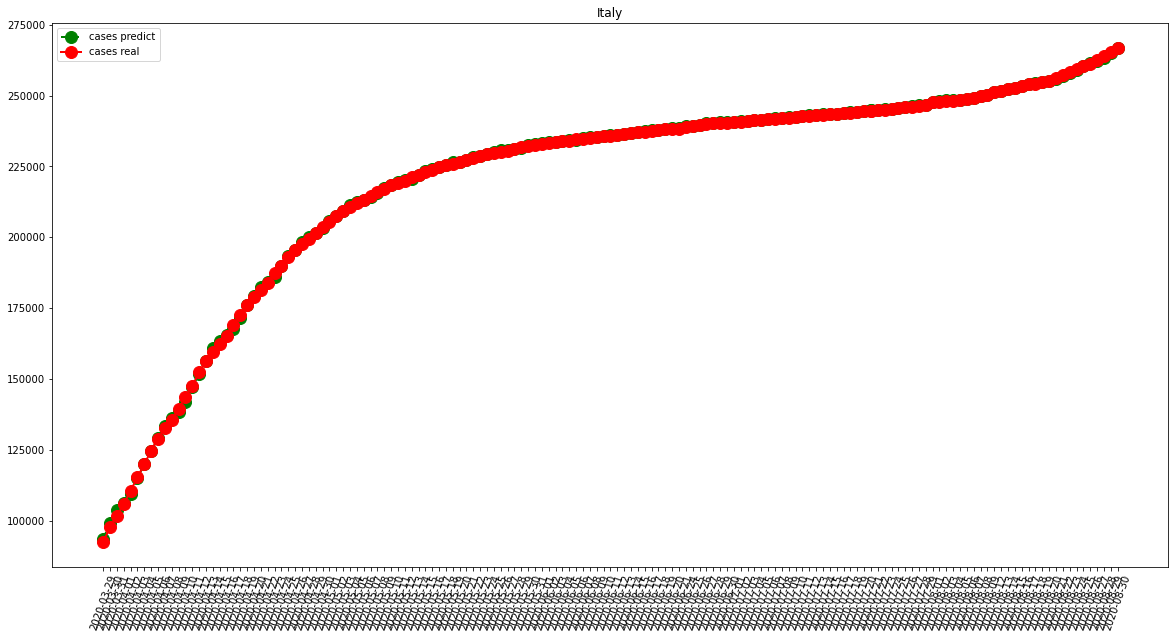

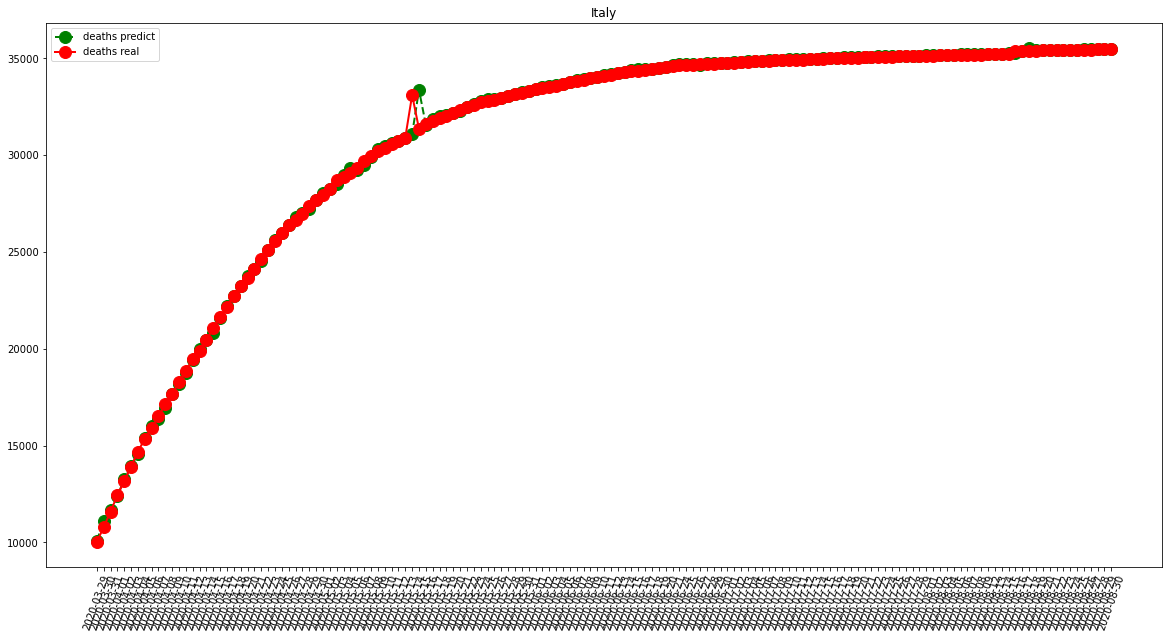

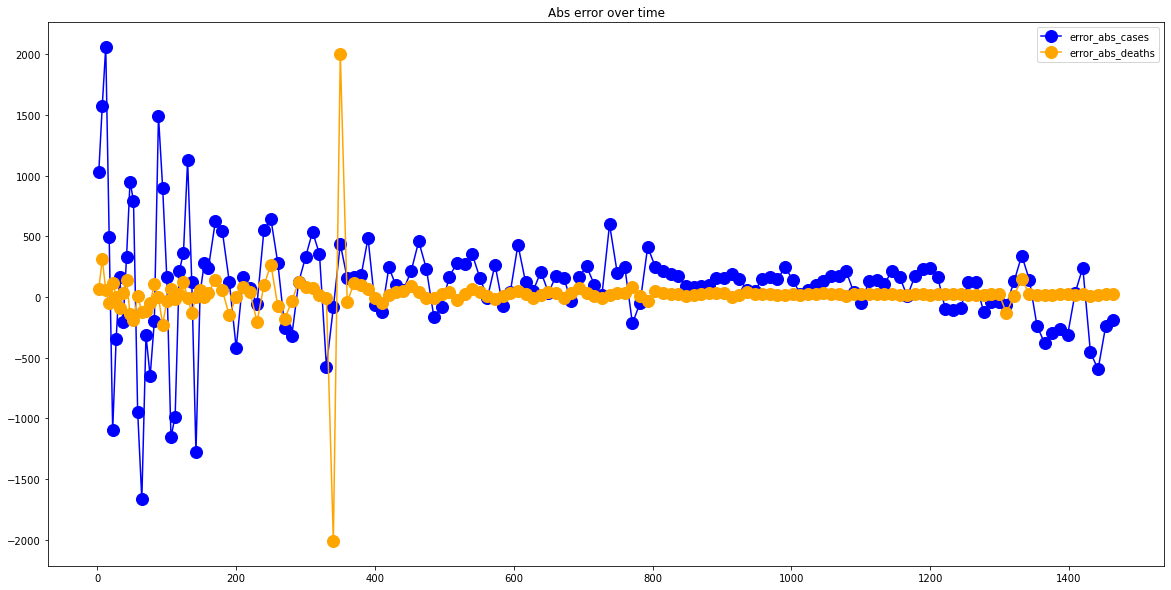

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1776.8733333333332
RMSE =  3369.4747711376817
-- Spain performances for deaths --
MAE =  127.41333333333333
RMSE =  331.7381296545012


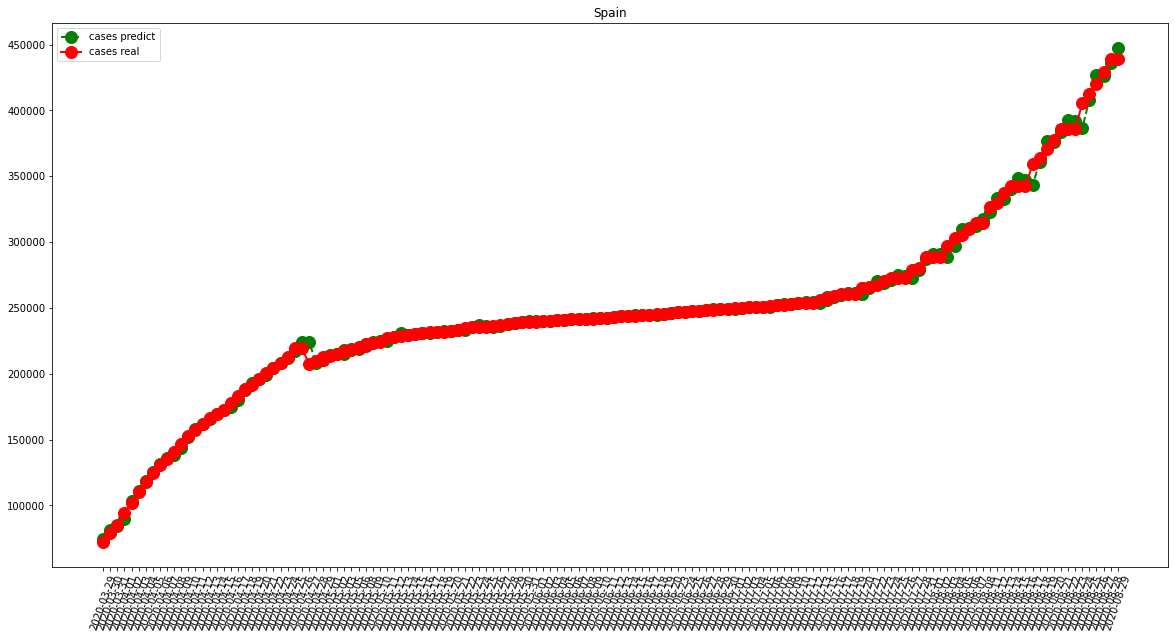

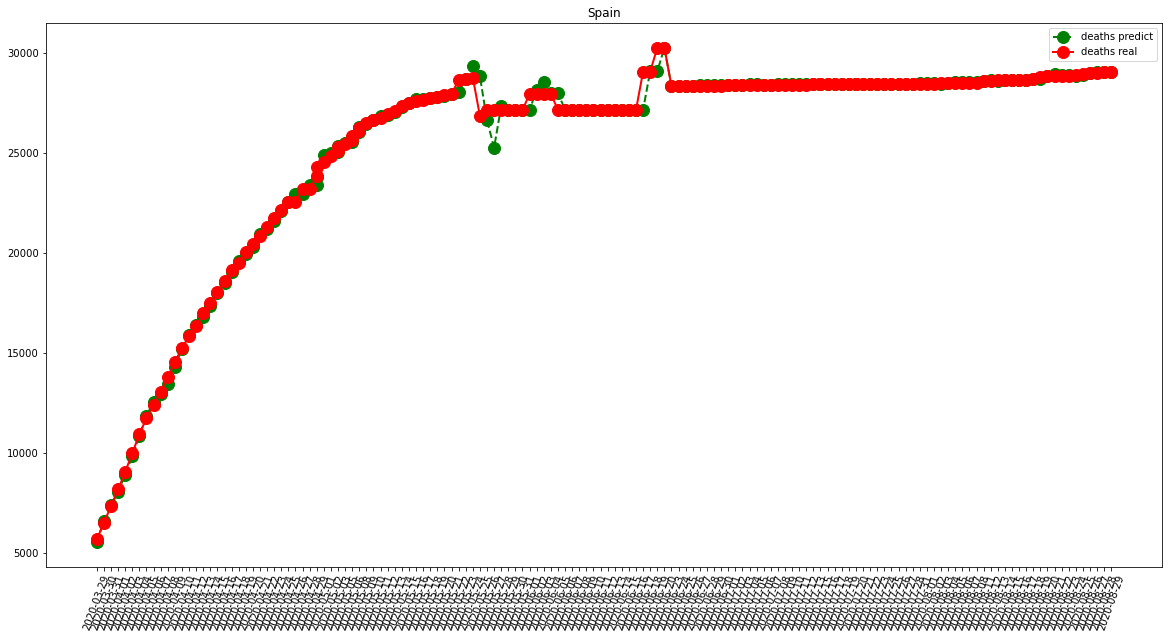

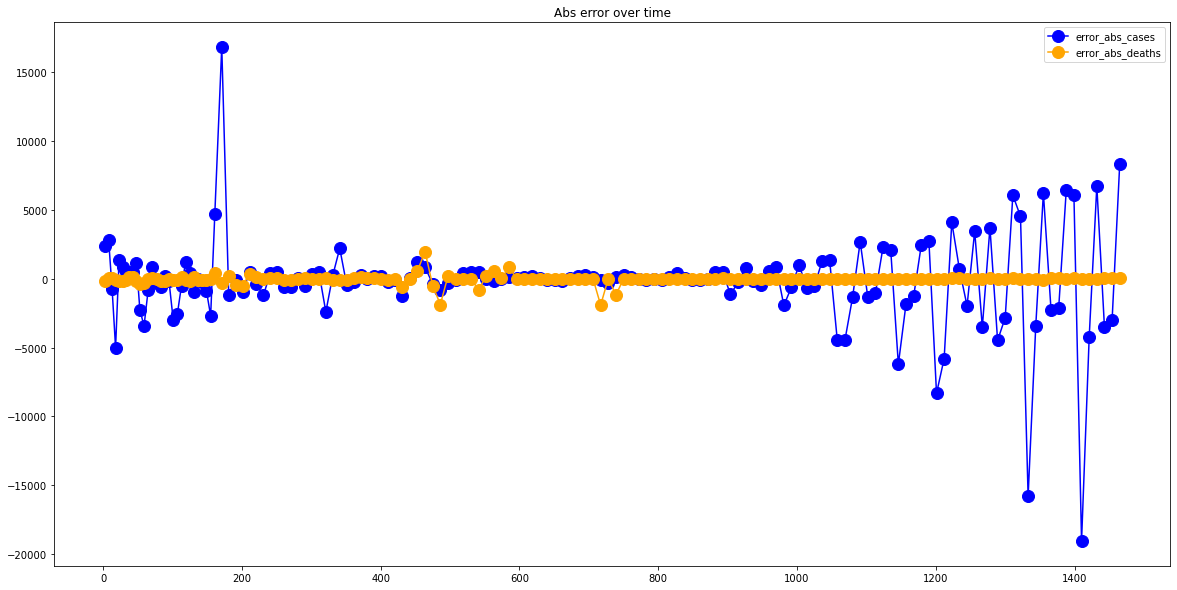

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  11548.38
RMSE =  18062.1554566447
-- United States performances for deaths --
MAE =  487.35333333333335
RMSE =  691.9059136424065


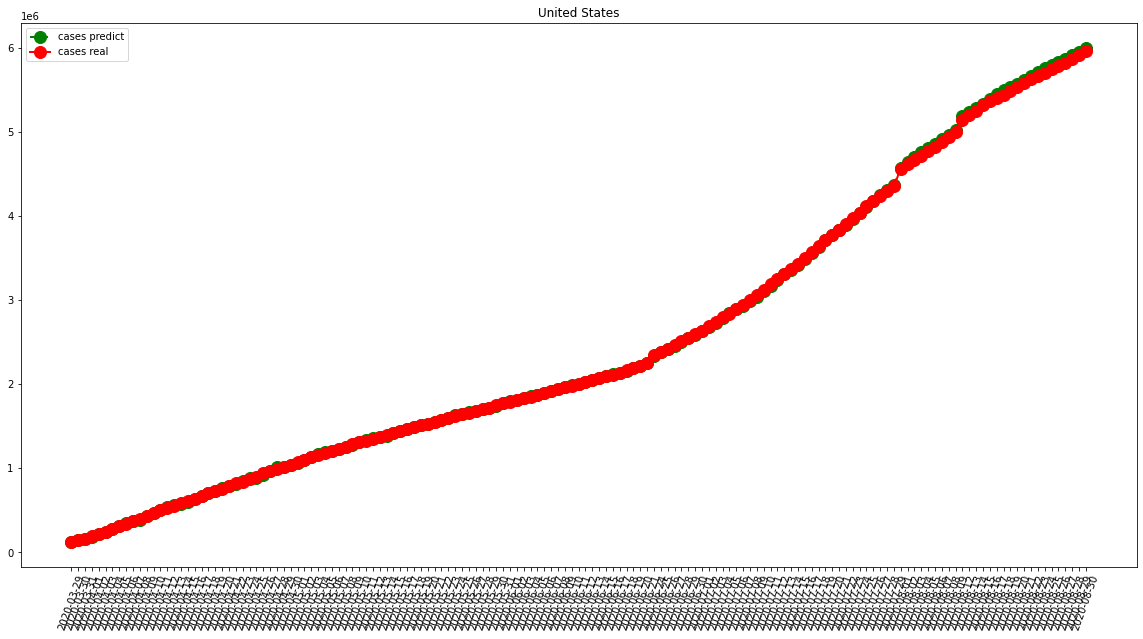

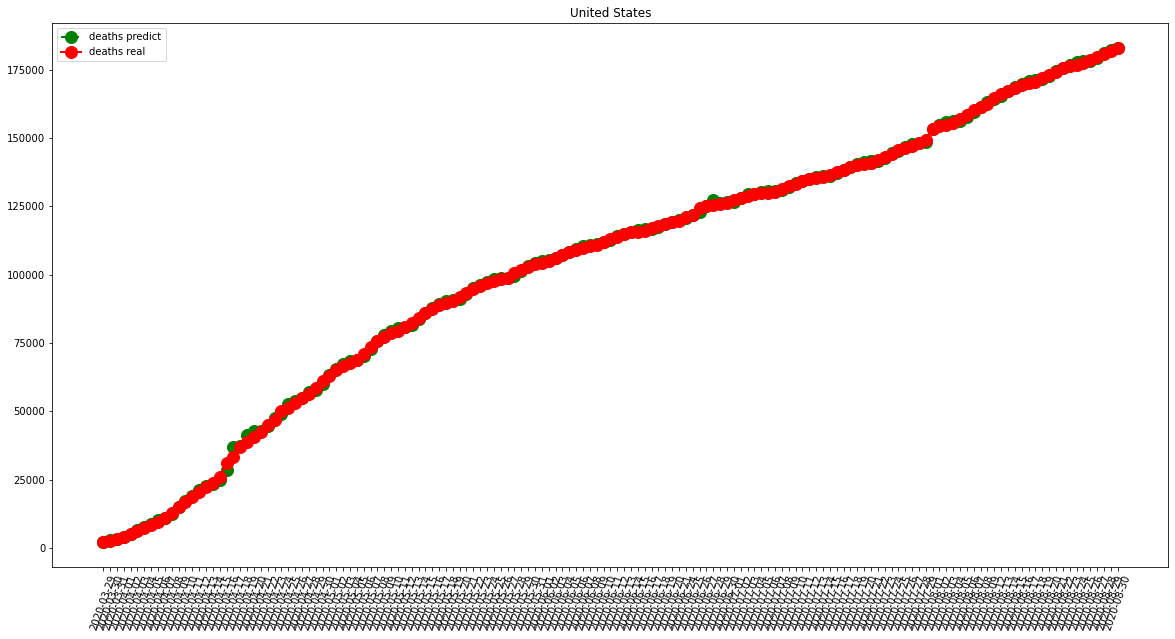

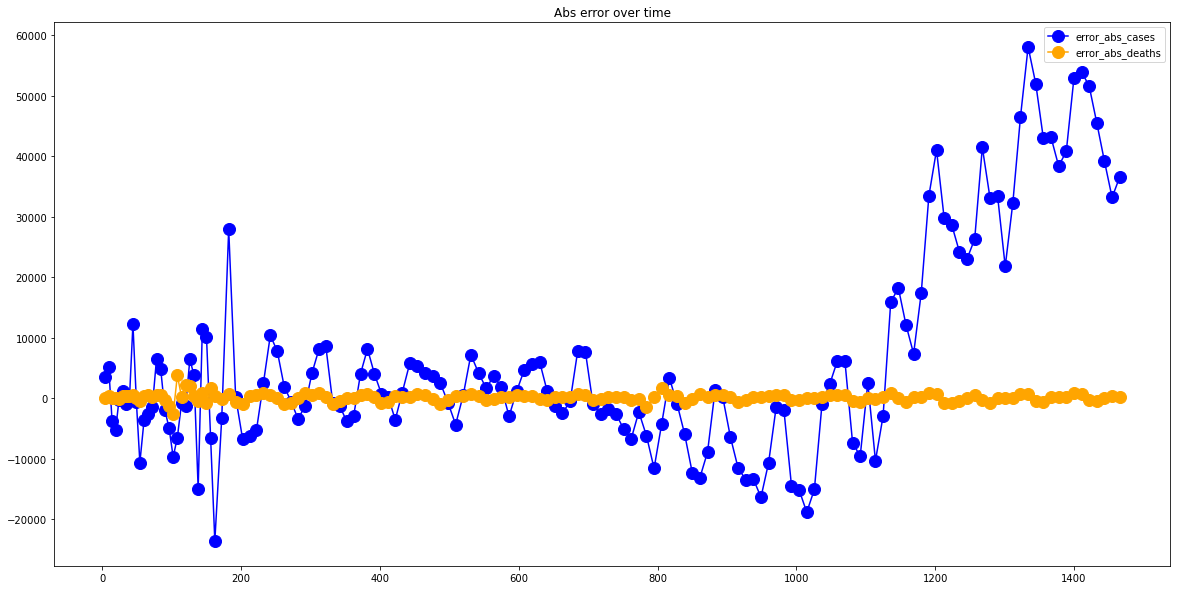

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  66.55333333333333
RMSE =  97.41536497562042
-- China performances for deaths --
MAE =  27.713333333333335
RMSE =  128.20616209839525


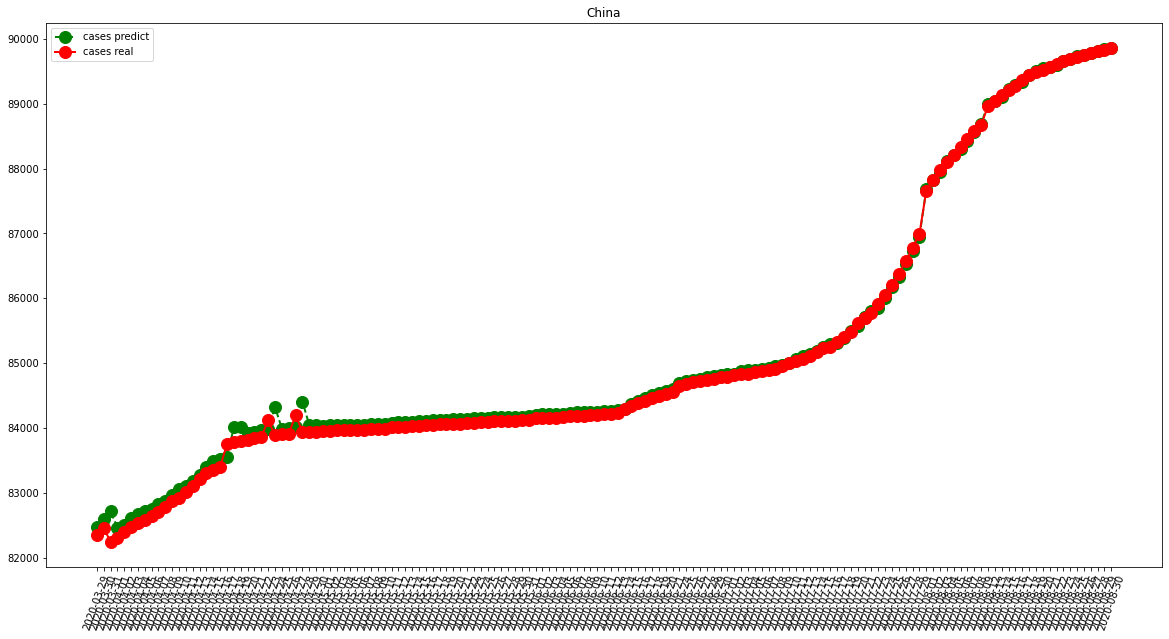

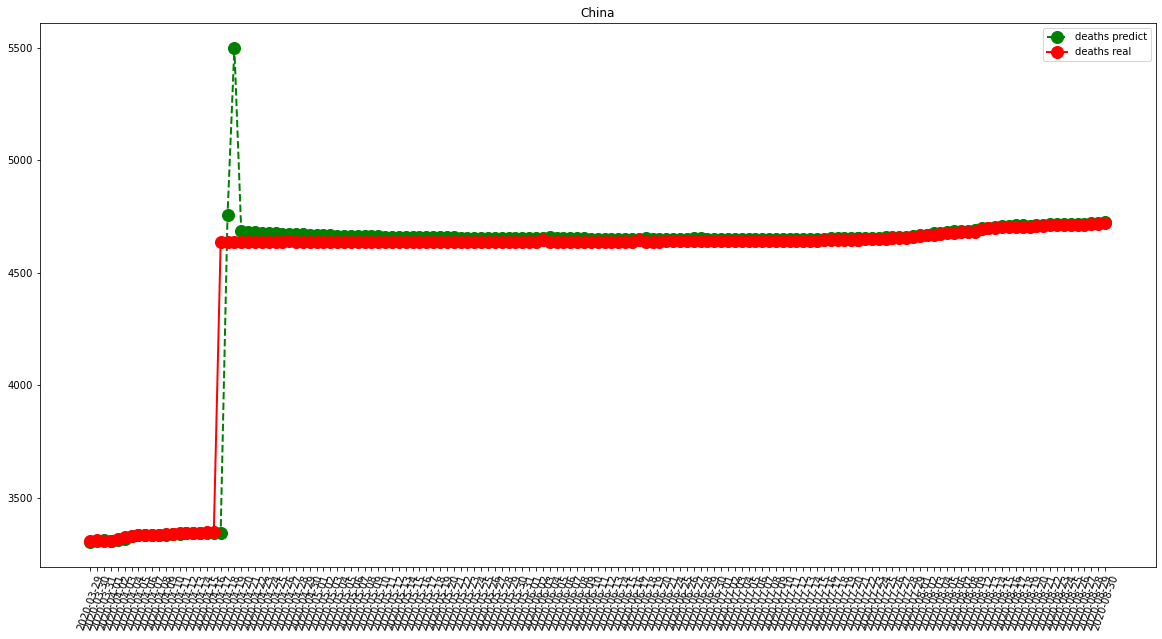

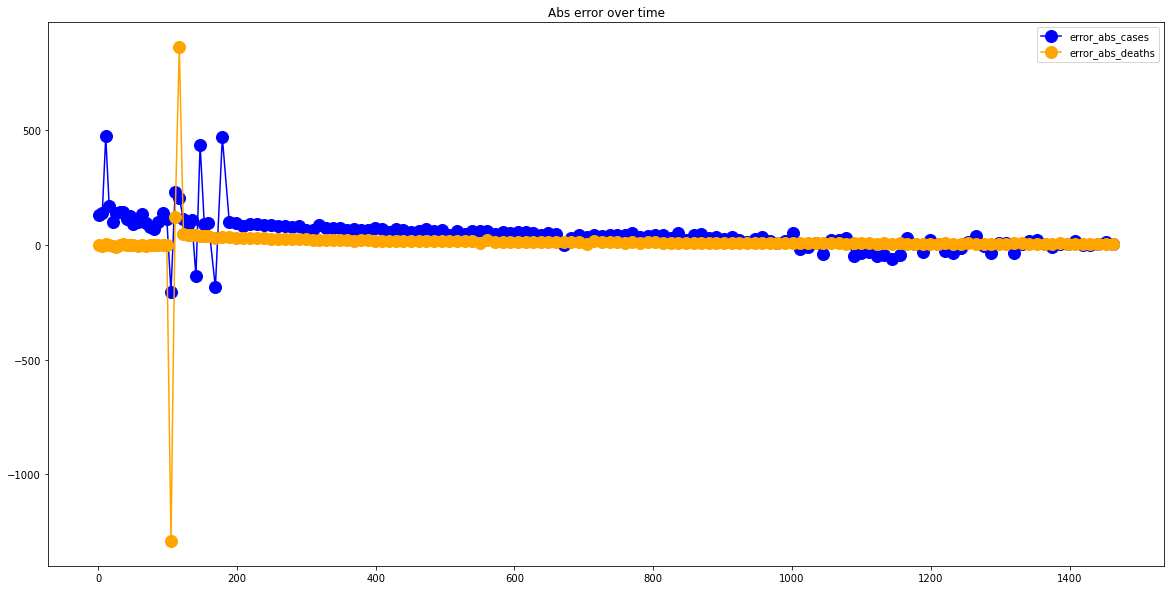

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1072.4426229508197
RMSE =  3785.4282019516822
-- United Kingdom performances for deaths --
MAE =  247.1639344262295
RMSE =  772.6231876949685


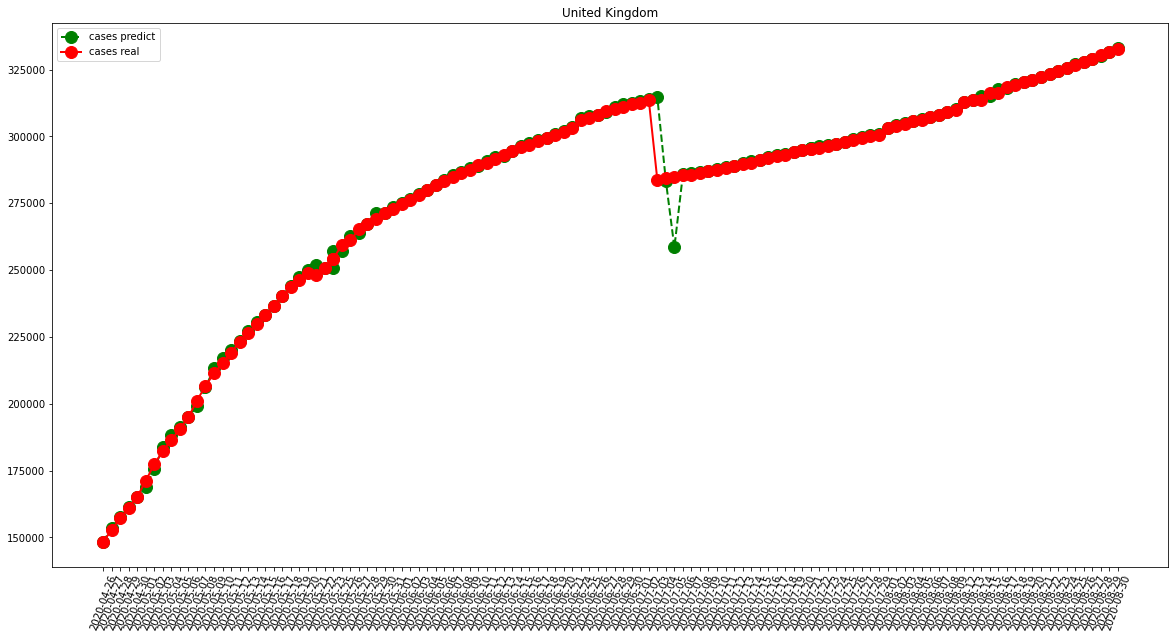

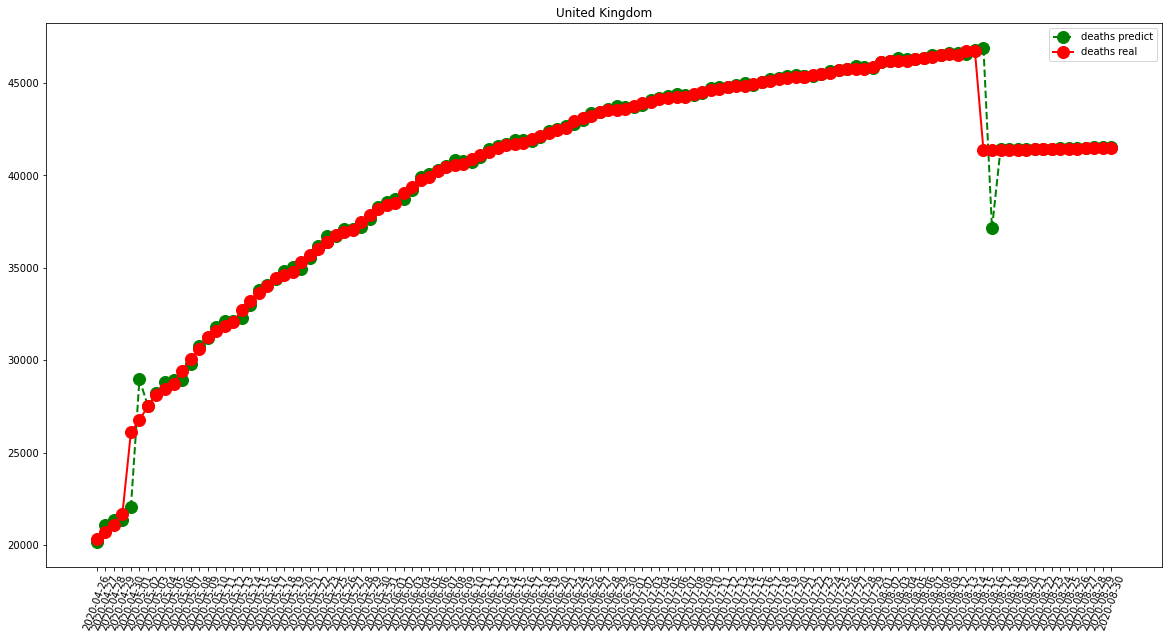

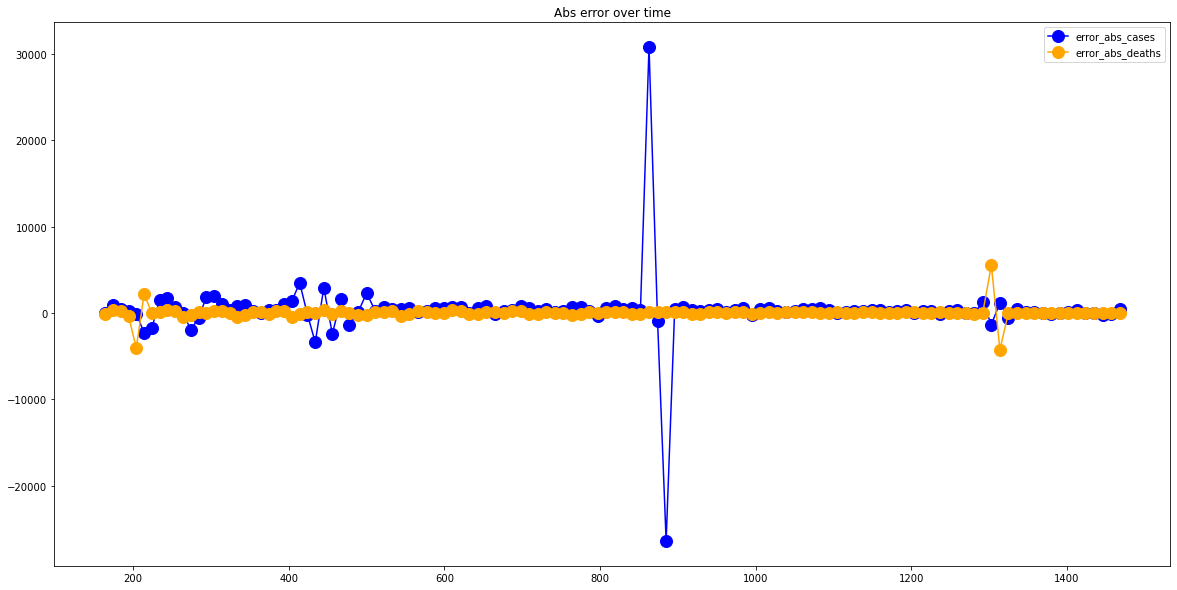

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  396.8360655737705
RMSE =  583.7925748858094
-- Germany performances for deaths --
MAE =  21.295081967213115
RMSE =  39.780957632565034


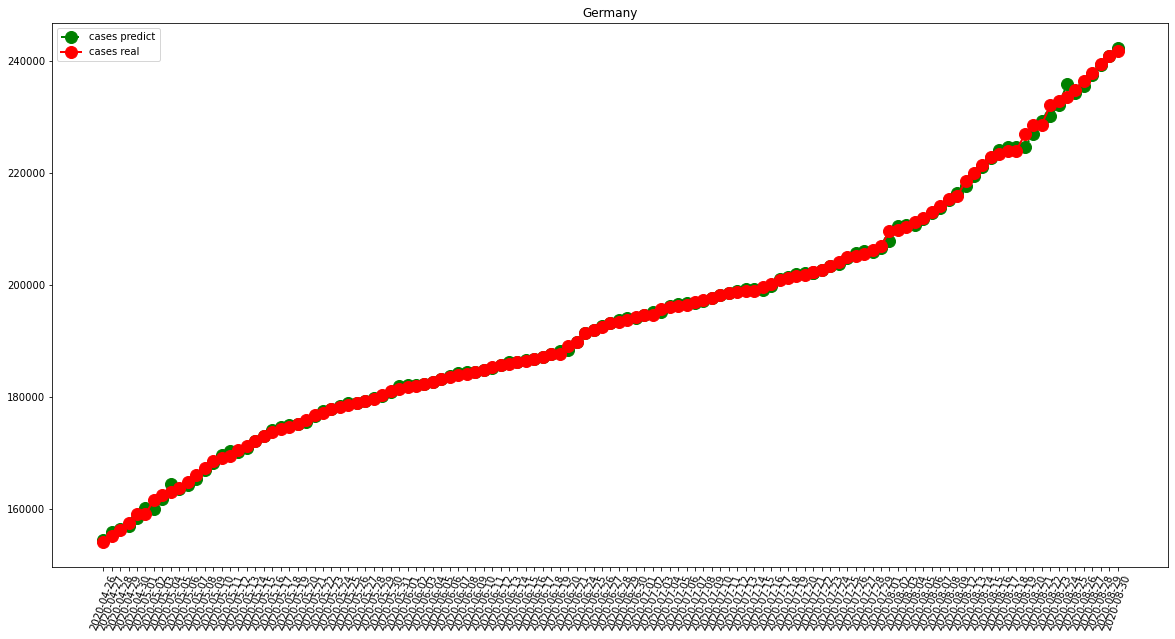

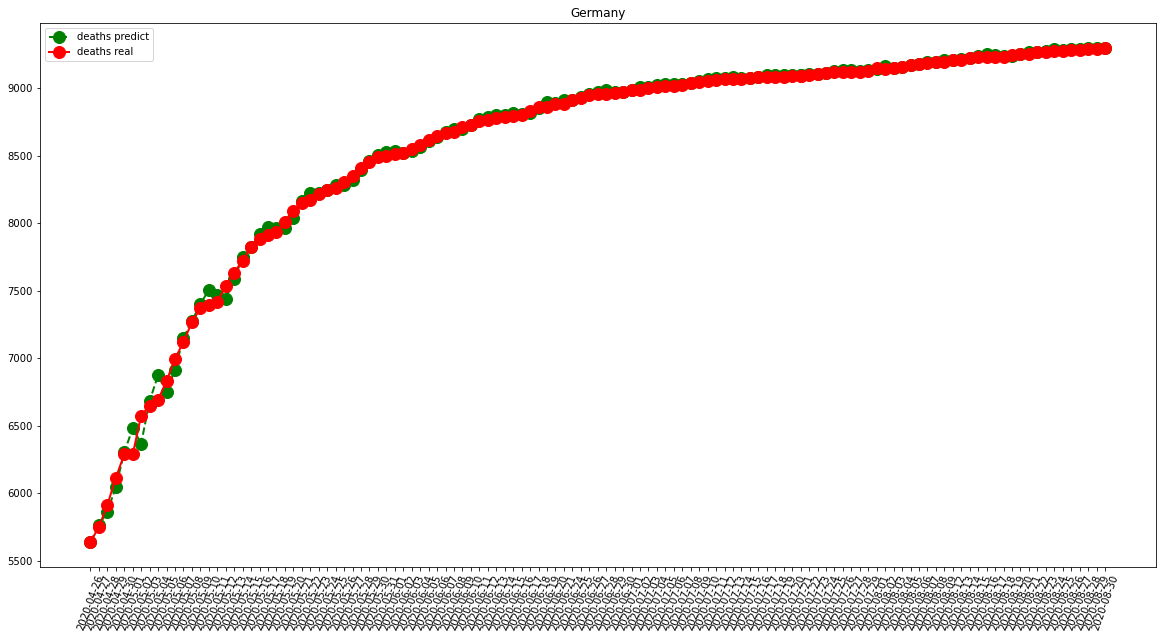

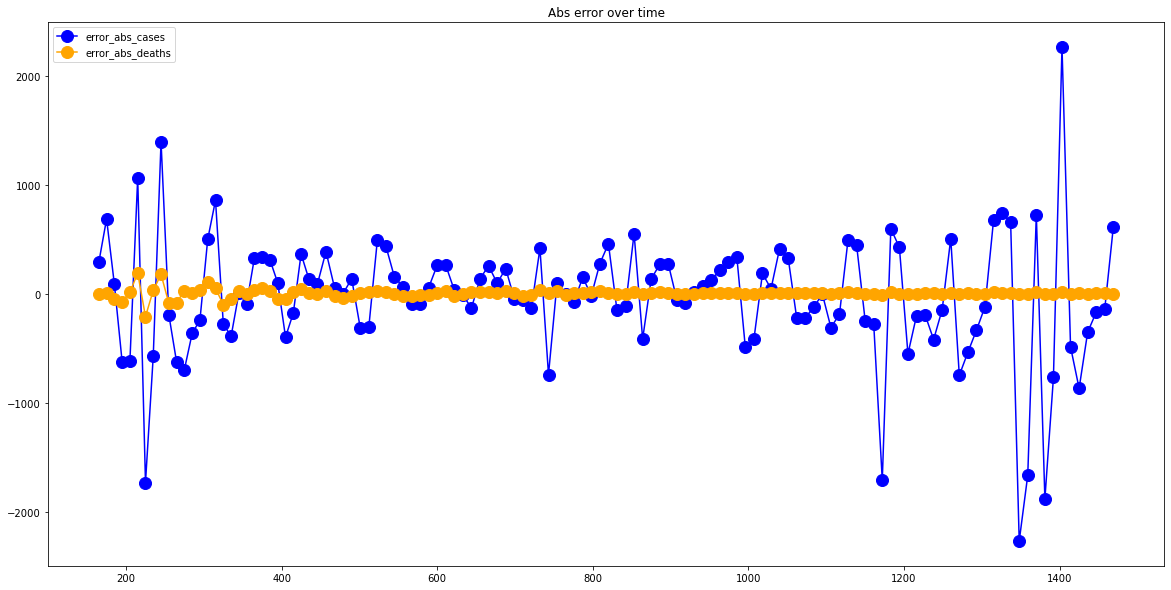

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  761.9672131147541
RMSE =  1127.8118666503635
-- Iran performances for deaths --
MAE =  42.85245901639344
RMSE =  80.55575403530601


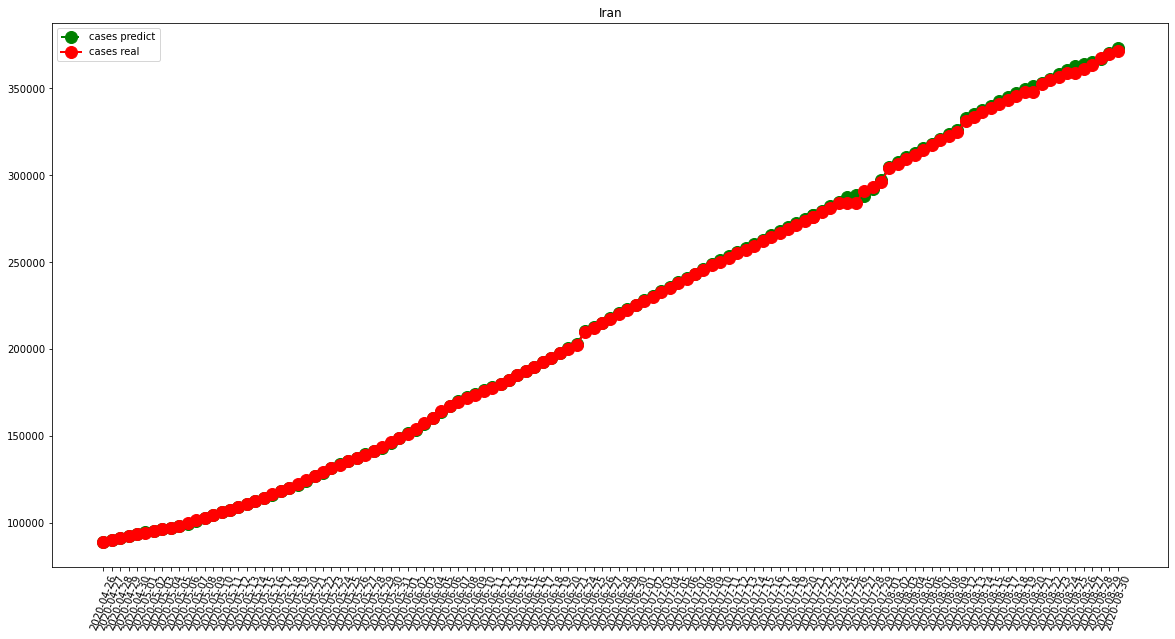

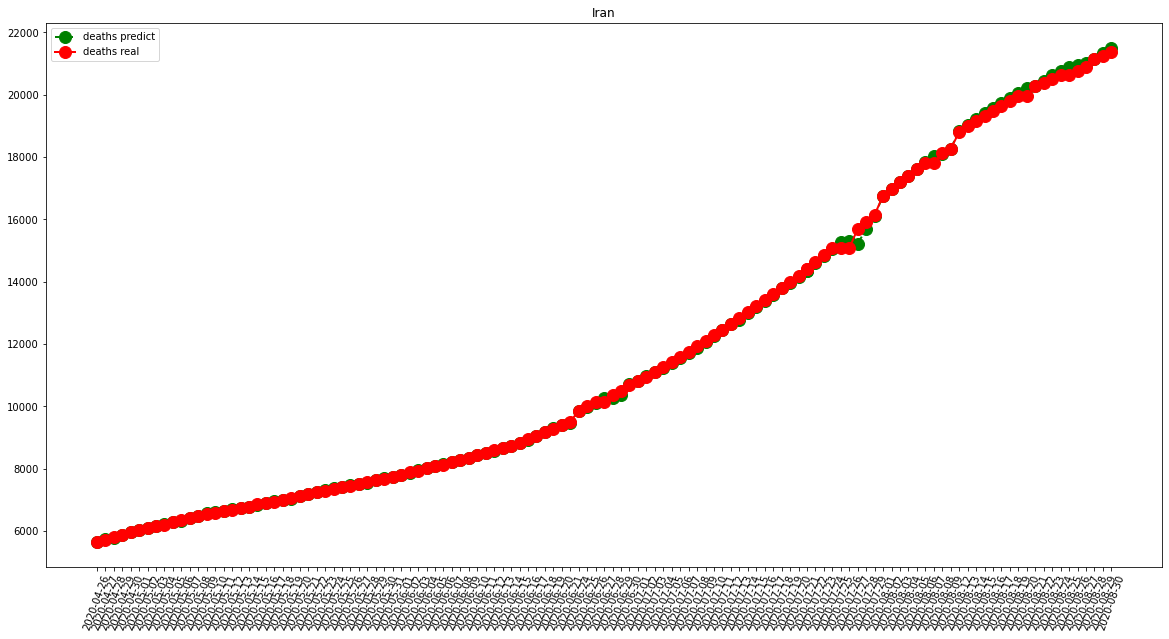

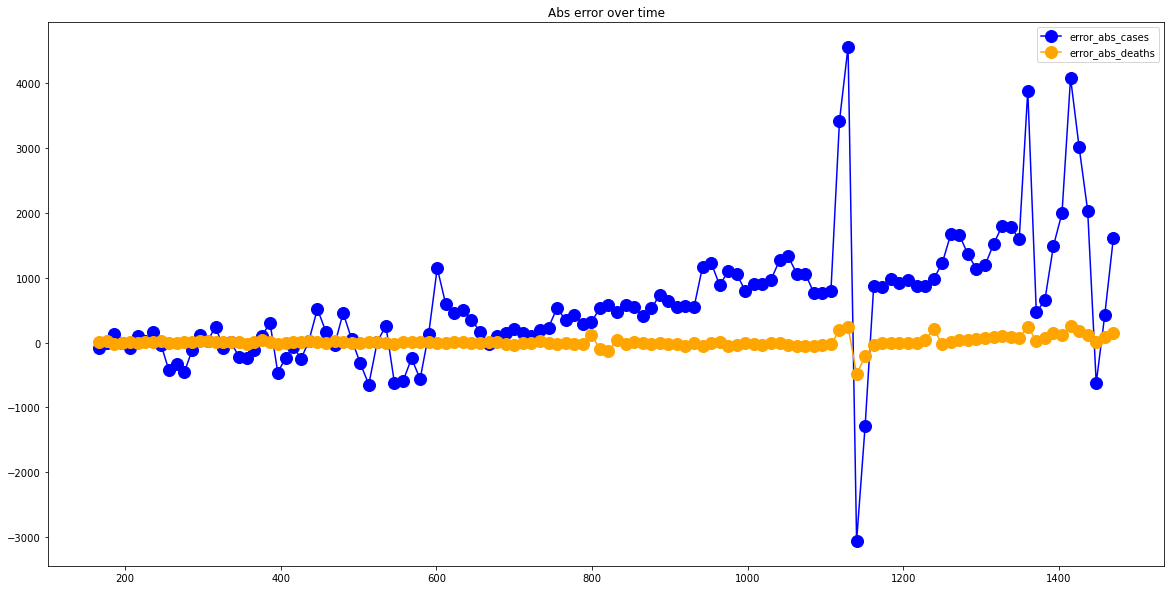

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  201.0655737704918
RMSE =  326.9812999114831
-- Turkey performances for deaths --
MAE =  16.385245901639344
RMSE =  91.94719617936101


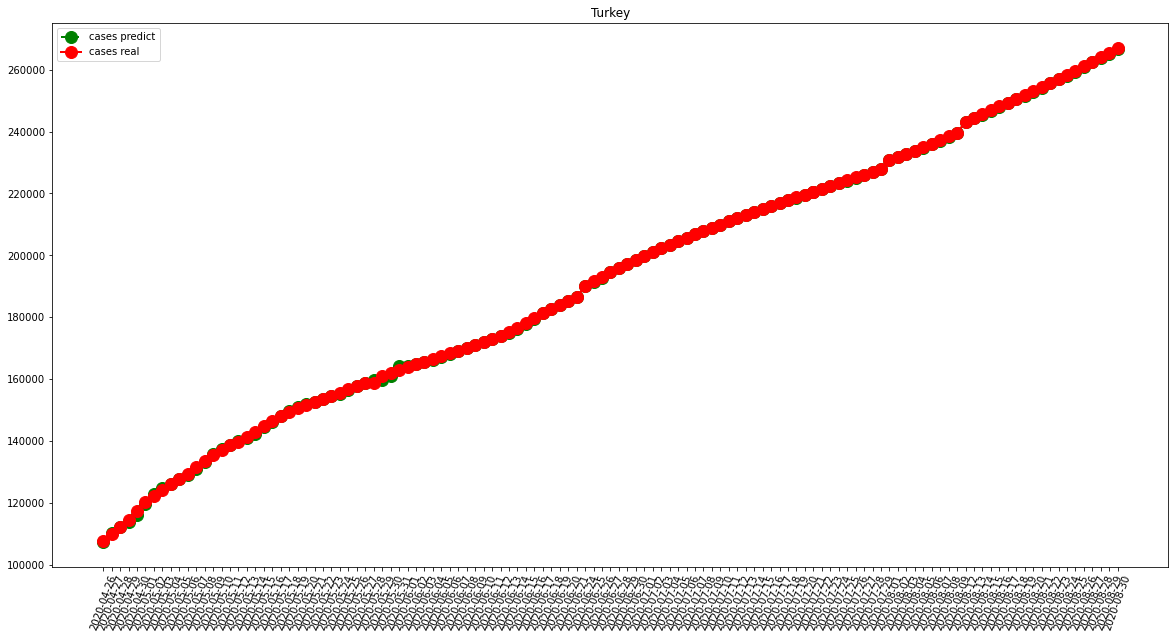

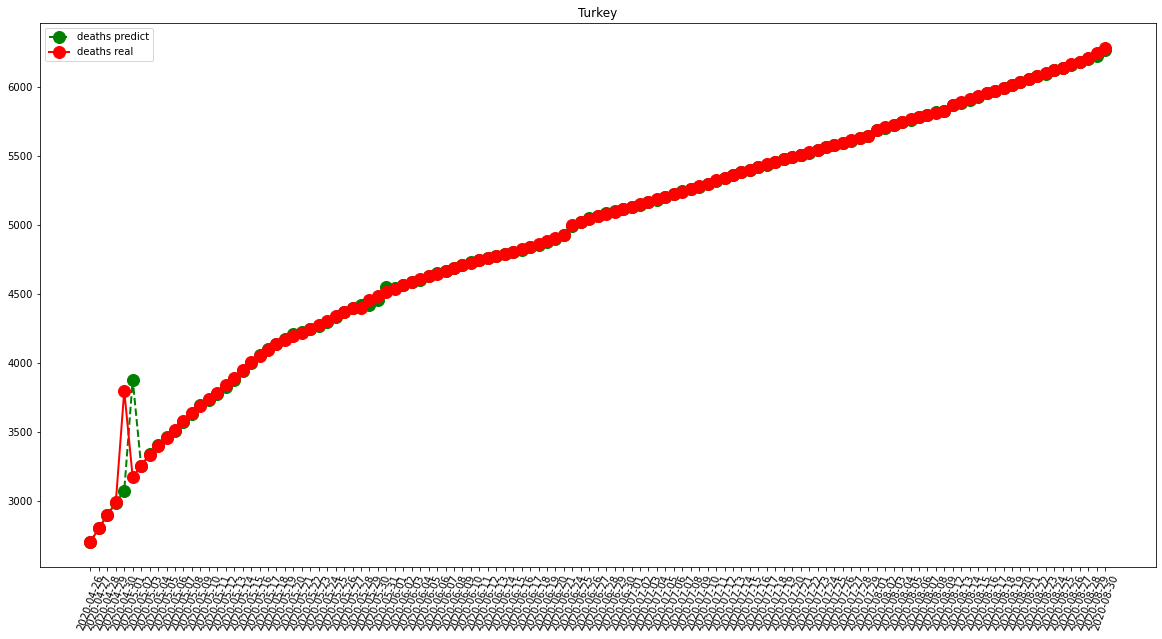

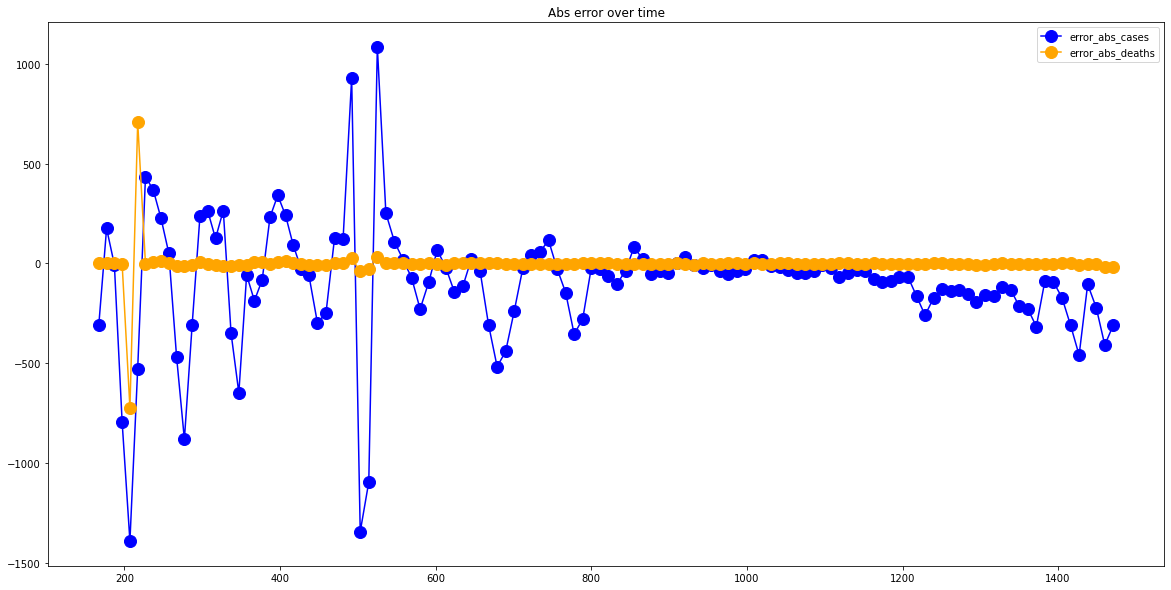

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  13545.17894736842
RMSE =  18015.105456547466
-- Brazil performances for deaths --
MAE =  424.63157894736844
RMSE =  519.2584591207167


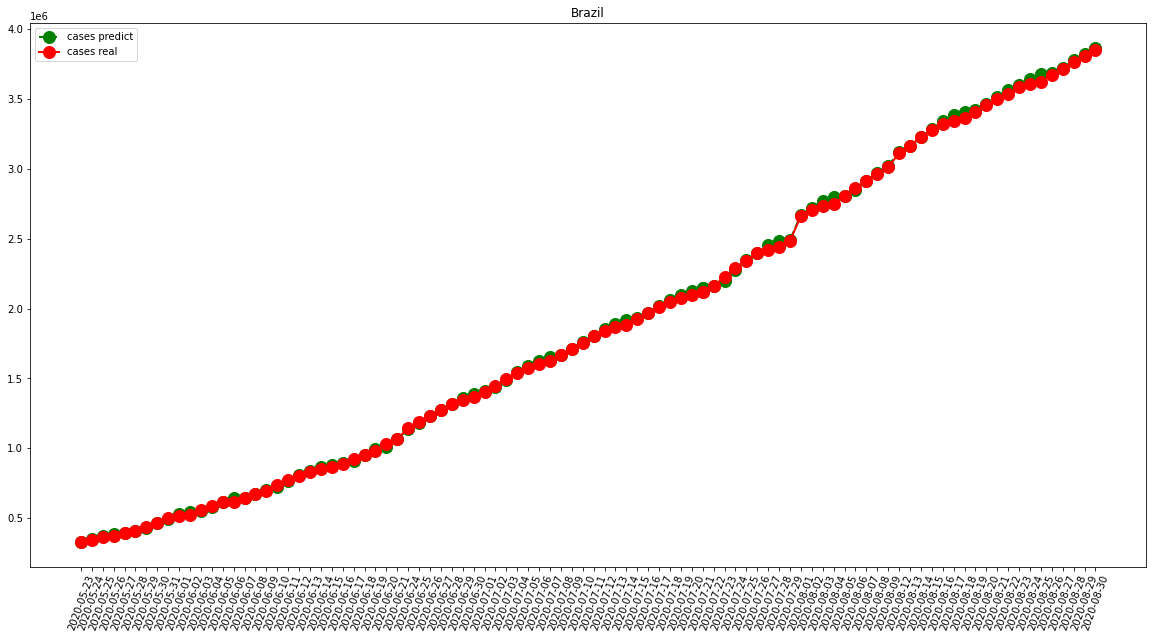

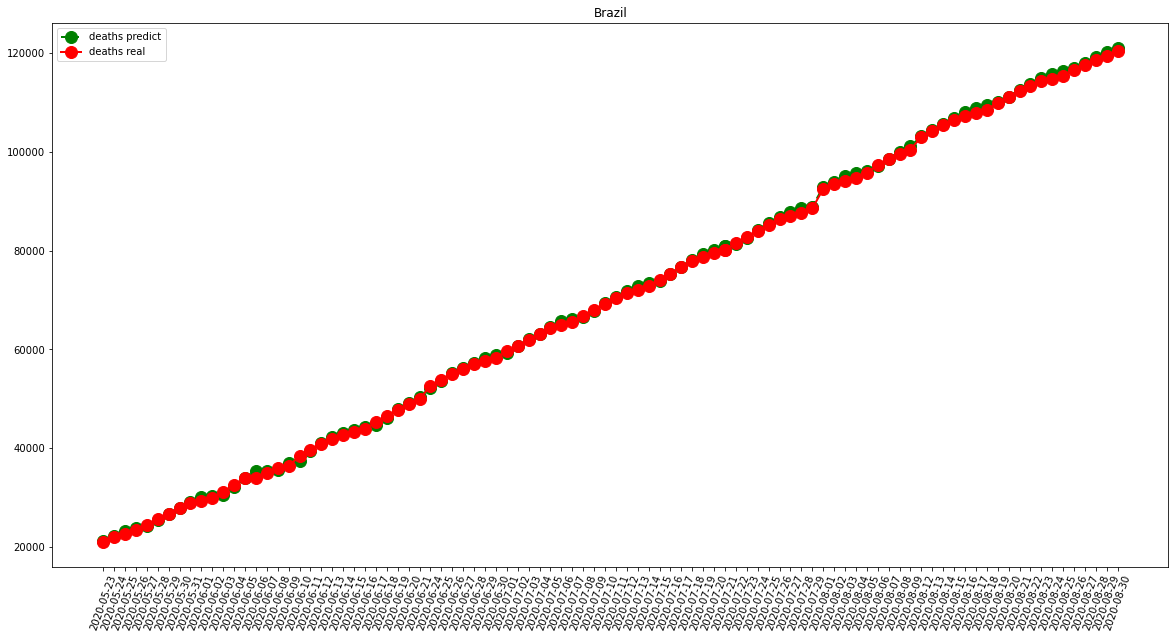

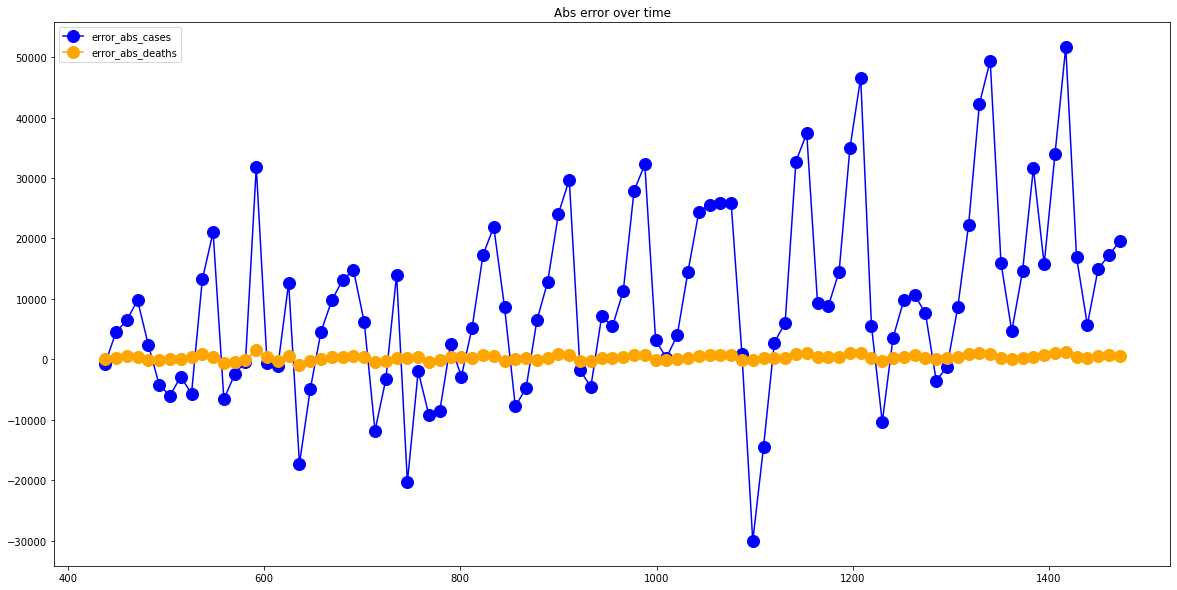

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)